In [3]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [4]:
# load investments csv & isolate USA only
investments_df = pd.read_csv("resources/investments.csv", delimiter=",",\
                             encoding = "unicode_escape").dropna()
investments_df.loc[investments_df['country_code']=='USA']

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0,0,0,0,0,0,0,0,0,0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",...,0,0,0,0,0,0,0,0,0,0
12,/organization/1-800-dentist,1-800-DENTIST,http://www.1800dentist.com,|Health and Wellness|,Health and Wellness,-,operating,USA,CA,Los Angeles,...,0,0,0,0,0,0,0,0,0,0
13,/organization/1-800-doctors,1-800-DOCTORS,http://1800doctors.com,|Health and Wellness|,Health and Wellness,"17,50,000",operating,USA,NJ,Newark,...,0,0,0,0,0,0,0,0,0,0
16,/organization/10-20-media,10-20 Media,http://www.10-20media.com,|E-Commerce|,E-Commerce,"20,50,000",operating,USA,MD,Baltimore,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49425,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,|Pharmaceuticals|,Pharmaceuticals,"1,30,00,000",operating,USA,PA,Philadelphia,...,0,0,0,0,0,0,0,0,0,0
49426,/organization/zynga,Zynga,http://www.zynga.com,|Technology|Facebook Applications|Networking|G...,Technology,"86,65,50,786",operating,USA,CA,SF Bay Area,...,0,0,15026000,355187000,490000000,0,0,0,0,0
49427,/organization/zyngenia,Zyngenia,http://www.zyngenia.com,|Biotechnology|,Biotechnology,"2,50,00,000",operating,USA,MD,"Washington, D.C.",...,0,0,25000000,0,0,0,0,0,0,0
49429,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,|Biotechnology|,Biotechnology,"3,42,75,015",operating,USA,MO,MO - Other,...,0,0,0,12000000,0,0,0,0,0,0


In [5]:
# load income csv
kaggle_income_df = pd.read_csv("resources/kaggle_income.csv", delimiter=",",\
                               encoding = "unicode_escape")

In [6]:
invest_df = investments_df.iloc[:,1:9]
invest_df['funding_total_usd '] = invest_df['funding_total_usd '].str.replace(',','').str.replace('-','0').astype(int)
invest_df

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY
8,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,0,operating,USA,IL
12,1-800-DENTIST,http://www.1800dentist.com,|Health and Wellness|,Health and Wellness,0,operating,USA,CA
13,1-800-DOCTORS,http://1800doctors.com,|Health and Wellness|,Health and Wellness,1750000,operating,USA,NJ
16,10-20 Media,http://www.10-20media.com,|E-Commerce|,E-Commerce,2050000,operating,USA,MD
...,...,...,...,...,...,...,...,...
49425,Zynerba Pharmaceuticals,http://zynerba.com,|Pharmaceuticals|,Pharmaceuticals,13000000,operating,USA,PA
49426,Zynga,http://www.zynga.com,|Technology|Facebook Applications|Networking|G...,Technology,866550786,operating,USA,CA
49427,Zyngenia,http://www.zyngenia.com,|Biotechnology|,Biotechnology,25000000,operating,USA,MD
49429,ZYOMYX,http://www.zyomyx.com,|Biotechnology|,Biotechnology,34275015,operating,USA,MO


In [7]:
income_df = kaggle_income_df.iloc[:,[3,-4]].dropna()
income_df

,State_ab,Mean
0,AL,38773
1,AL,37725
2,AL,54606
3,AL,63919
4,AL,77948
...,...,...
32521,PR,30649
32522,PR,15520
32523,PR,41933
32524,PR,0


In [8]:
# groupby 'State_ab' and calc avg income of each state using 'Mean'
income_mean_df = pd.DataFrame(income_df.groupby('State_ab')['Mean'].mean()\
                              .astype(int)).reset_index().\
                            rename(columns={'State_ab':'state_code'})
income_mean_df

,state_code,Mean
0,AK,77670
1,AL,53612
2,AR,52060
3,AZ,62578
4,CA,78126
5,CO,73322
6,CT,89227
7,DC,90668
8,DE,70142
9,FL,60887


In [9]:
# Sum total investments by state
invest_df_sum_by_state = pd.DataFrame(invest_df.groupby('state_code')['funding_total_usd ']\
                                      .sum()).reset_index()
invest_df_sum_by_state

,state_code,funding_total_usd
0,AB,754075351
1,AK,9216938
2,AL,1462956640
3,AR,172352212
4,AZ,2161587159
...,...,...
56,VT,165404101
57,WA,14407726574
58,WI,2687754856
59,WV,62567027


In [10]:
# Merge on 'state_code'
inv_inc_df = pd.merge(invest_df_sum_by_state,income_mean_df,on="state_code")
inv_inc_df

,state_code,funding_total_usd,Mean
0,AK,9216938,77670
1,AL,1462956640,53612
2,AR,172352212,52060
3,AZ,2161587159,62578
4,CA,156303412150,78126
5,CO,6693679567,73322
6,CT,2493201589,89227
7,DC,2027901863,90668
8,DE,324832983,70142
9,FL,6946376465,60887


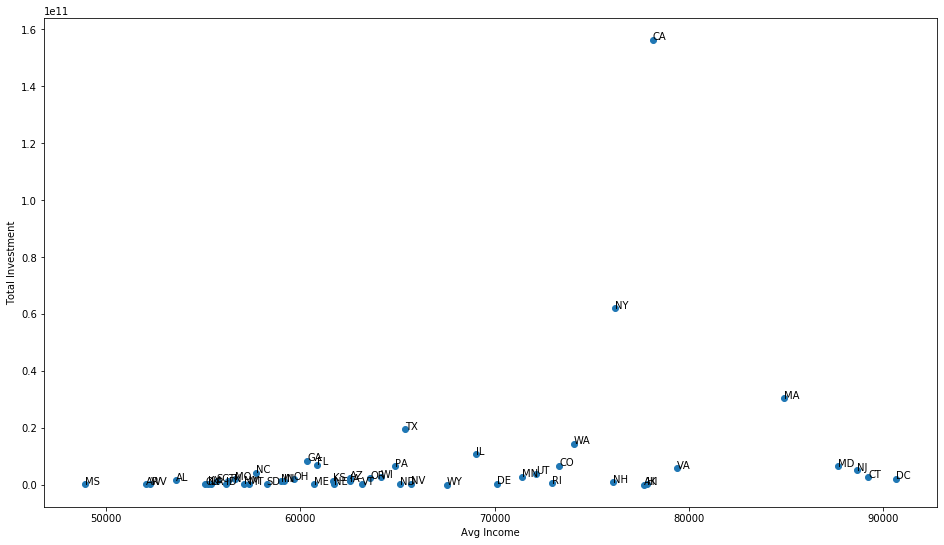

In [11]:
x = inv_inc_df['funding_total_usd ']
y = inv_inc_df['Mean']
z = inv_inc_df['state_code']
fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel('Avg Income')
ax.set_ylabel('Total Investment')
ax.scatter(y,x)
for i, txt in enumerate(z):
    ax.annotate(txt,(y[i],x[i]))

In [17]:
status_df = investments_df.iloc[:,[1,6]]
status_df

,name,status
0,#waywire,acquired
8,004 Technologies,operating
12,1-800-DENTIST,operating
13,1-800-DOCTORS,operating
16,10-20 Media,operating
...,...,...
49425,Zynerba Pharmaceuticals,operating
49426,Zynga,operating
49427,Zyngenia,operating
49429,ZYOMYX,operating


,name,status
0,#waywire,acquired
8,004 Technologies,operating
12,1-800-DENTIST,operating
13,1-800-DOCTORS,operating
16,10-20 Media,operating
...,...,...
49425,Zynerba Pharmaceuticals,operating
49426,Zynga,operating
49427,Zyngenia,operating
49429,ZYOMYX,operating


In [23]:
status_df.to_csv(r'resources/status.csv')


In [37]:
company_df = investments_df.loc[:,['name','state_code','funding_total_usd ','homepage_url','market ']]
company_df['funding_total_usd '].str.replace(',','').str.replace('-','0').astype(int)

0          1750000
8                0
12               0
13         1750000
16         2050000
           ...    
49425     13000000
49426    866550786
49427     25000000
49429     34275015
49437     45000000
Name: funding_total_usd , Length: 21840, dtype: int64